## Introduction

This document is to describe **mSPRT**(mixture sequential probability ratio test) proposed in Optimizely's paper [1].

## One-sample mSPRT

For a single stream of data $X_{1},...., X_{n}$ from a distribution with parameter $\theta$ taking values in $\Theta \subset R$, we want to test the following hypotheses:

$$H_{0}: \theta = \theta_{0}$$
$$H_{a}: \theta \neq \theta_{0}$$

The test is defined by a mixing distribution $H$ over $\Theta$, where $H$ is assumed to have a density $h$ that is positive everywhere. Using $H$, we first compute the following mixture of likelihood ratios against the null hypothesis that $\theta = \theta_{0}$:

$$\Lambda^{H, \theta_{0}}_{n} = \int_{\Theta} \prod^{n}_{m=1} \frac{f_{\theta}(X_{m})}{f_{\theta_{0}}(X_{m})} h(\theta) d\theta $$

Given a desired false positive probability $\alpha$, it stops and rejects the null hypothesis at **the first time** $T = T^{H}(\alpha)$ that $\Lambda^{H, \theta_{0}}_{n} > \alpha^{-1}$; if no such time exists, it never rejects the null hypothesis. Using standard martingale techniques, it can be shown that this sequential test control Type I error at level $\alpha$. 

For data generated by general exponential families, as long as an appropriate conjugate prior is chosen as $H$, computation of $\Lambda^{H, \theta_{0}}_{n}$ (and thus both always valid p-values and always valid confidence intervals) is inexpensive. For example, for data generated from a normal distribution(i.e. where $F_{\theta} = N(\theta, \sigma^{2}$)), it turns out that if we use a normal mixing distribution centered at the null hypothesis(i.e., $H = N(\theta_{0}, \tau^2)$, then we obtain a closed form formula for $\Lambda^{H,\theta_{0}}_{n}$:

$$\Lambda^{H,\theta_{0}}_{n} = \sqrt{\frac{V_{n}}{V_{n}+\tau}} \times exp \{ \frac{\tau }{2V_{n}(V_{n}+\tau)}(\overline{X}_{n} - \theta_{0})^{2}\},\ \ where\ V_{n} = \frac{\sigma^{2}}{n} \ \ \ \ \ (1)$$ [1]

## Always valid p-value process

The authors of Optimizely's paper define always valid p-value process as follows:


>A sequence of p-values ($p_{n}$) is an always valid p-value process if given any stopping time $T$, there holds:  
>  
>$$\forall \alpha \in [0, 1], P_{\theta_{0}}(p_{T} \le \alpha) \le \alpha $$


For a given mSPRT $\Lambda^{H, \theta_{0}}_{n}$ sequence, it can be shown that $p_{n}$ satisfying the following simple recursion is an always valid p-value process:  
  
$$p_{0} = 1; p_{n} = min \{ p_{n-1}, 1/{\Lambda^{H, \theta_{0}}_{n}}\}$$ [1]

## Always valid confidence interval process

The author also define always valid confidence interval process as follows:

>A sequence of (1- $\alpha$)-level confidence intervals ($I_{n}$) is an always valid confidence interval process if for any stopping time $T$, the corresponding interval $I_{T}$ has $1 - \alpha$ coverage of the true parameter: 
>  
>$$\forall \theta \in \Theta, P_{\theta}(\theta \in I_{T}) \ge 1- \alpha $$


For a given mSPRT $\Lambda^{H, \theta_{0}}_{n}$ sequence, it also can be shown that $I_{n}$ satisfying the following simple recursion is an always valid confidence interval process:  

$$I_{0} = \Theta; I_{n} = I_{n-1} \cap \{\theta: \Lambda^{H, \theta}_{n} \ge \alpha^{-1}\}$$ [1]


Using the equation (1), we can derive the range of $\theta$ that satisifies $\{\theta: \Lambda^{H, \theta}_{n} \ge \alpha^{-1}\}$, i.e.


$$\overline{X}_{n} \pm \sqrt{\frac{V_{n}(V_{n}+\tau)}{\tau}(-2\log(\alpha)-\log(\frac{V_{n}}{V_{n}+\tau})}$$


## Two-sample mSPRT

To get an mSPRT for A/B testing, we need to define a mixture likelihood ratio ${\Lambda^{H, \theta_{0}}_{n}}$ for two-variation experiments, as a function of the data $X_{1},...., X_{n}, Y_{1},... Y_{n}$. We start by considering normal data. In this case, note that for any $\mu^{A}$ and $\mu^{B}$, $Z_{n} = Y_{n} - X_{n}$. We can thus simply apply the one-variation mSPRT to the sequence {$Z_{n}$}. The equation (1) continues to hold for this case except that we need to use $\ V_{n} = \frac{2\sigma^{2}}{n}$. 

## Choice of $\tau$ parameter

Uber's paper suggests to use $\overline{\delta}^{2}$ i.e. the square of observed effect size for $\tau$. That is, set $H = N(\theta_{0}, \overline{\delta}^{2})$

Uber's paper suggests to use $\overline{\delta}^{2}$ i.e. the square of observed effect size for $\tau$. That is, set $H = N(\theta_{0}, \overline{\delta}^{2})$

[2]

## Sample size estimation

Uber's paper offers the following formula to estimate the average sample size to have the power 1:

$E[N_{\delta}] = \frac{v_{x}+v_{y}}{\delta^{2}}\{log(-2\ log(\alpha)) - 2\ log(\alpha)\}$, where $\delta$ is the effect size.

[2]

## Use burn in period to control variabilities

Due to the significant variabilities when the sample size is small, burn in method is implemented to minimize errors. The current default setting is: not apply test statistics for first 300 samples(i.e. burnIn = 300).

## Multiple Comparison Correction

Use Benjamini-Hochberg method to control FDR(false discovery rate). This method is less strict than Bonferroni correction method in control type I error but has greater power.

## Python prototype implementaion

In [1]:
import sys
import numpy as np
import pandas as pd
import util.helper as helper
import util.msprt_core as msprt_core
import util.sim_msprt as sim_msprt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

### The calc_stat fuction in msprt_core.py provides output statistics based on mSPRT.
### Two usage examples:

In [2]:
ret = msprt_core.calc_stat(sa=1817, na=9201, sb=1862, nb=9201, alpha=0.05)
ret

{'cvr_data': [1817, 9201, 1862, 9201],
 'cvr_a': 0.19747853494185413,
 'cvr_b': 0.2023693076839474,
 'effect': 0.004890772742093263,
 'tau': 2.391965801480246e-05,
 'V': 3.4767605061465084e-05,
 'Lambda': 0.8855343444158644,
 'decision_boundary': 0.023574315042331213,
 'burnIn': 300,
 'p_value': 1,
 'effect_ci': [-0.01868354230023795, 0.028465087784424477],
 'msprt_res': 'U'}

In [3]:
ret = msprt_core.calc_stat(sa=250, na=11221, sb=1600, nb=14187, alpha=0.05)
ret

{'cvr_data': [250, 11221, 1600, 14187],
 'cvr_a': 0.02227965421976651,
 'cvr_b': 0.11277930499753296,
 'effect': 0.09049965077776645,
 'tau': 0.008190186790897683,
 'V': 8.994240189472143e-06,
 'Lambda': 1.0920192340563011e+196,
 'decision_boundary': 0.010738377800969734,
 'burnIn': 300,
 'p_value': 9.15734786360405e-197,
 'effect_ci': [0.07976127297679672, 0.10123802857873618],
 'msprt_res': 'B'}

### The possible range of each output statistic:

cvr_a $\in$ [0, 1]         
cvr_b $\in$ [0, 1]       
effect $\in$ [-1, 1]        
tau $\in$ [0, 1]   
V $\ge$ 0  
Lambda $\in$ (0, $\infty$)       
decision_boundary $\in$ (0, $\infty$)      
p_value $\in$ (0, 1]       
effect_ci[0] $\in$ [-1000, 1000]        
effect_ci[1] $\in$ [-1000, 1000]  & effect_ci[1] $\gt$ effect_ci[0]

### An example to demonstrate how always valid p-value and confidence interval are computed recursively. 

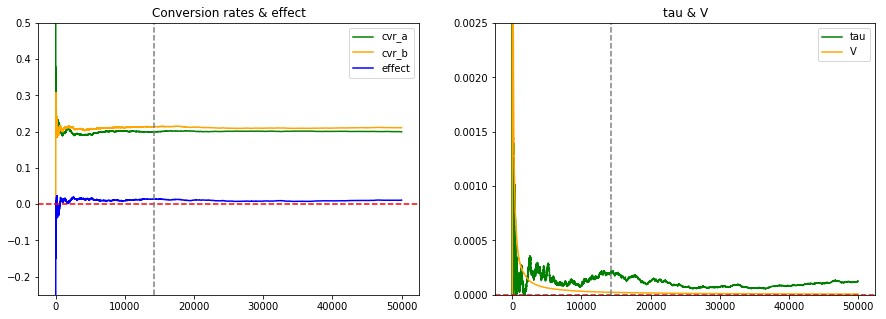

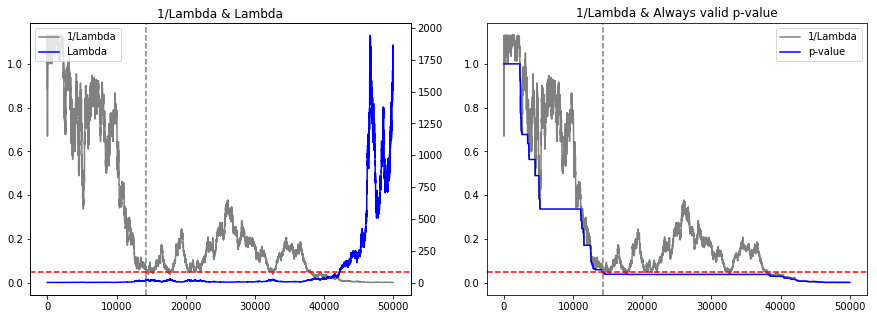

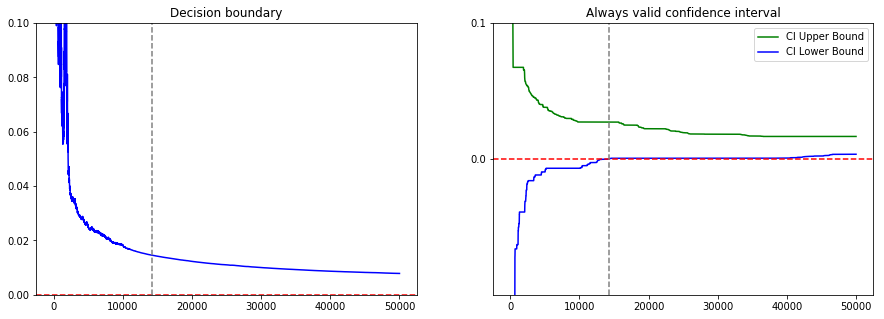

In [5]:
np.random.seed(2019)

n = 50000
x = np.cumsum(np.random.binomial(1, 0.2, n))
y = np.cumsum(np.random.binomial(1, 0.21, n))

cvr_a, cvr_b, effect, tau, V, Lambda, decision_boundary, p_val, sig_val, ci_lb, ci_ub, res = ([] for i in range(12))
prev_p_val = 1
prev_effect_ci = [-1000,1000]

for i in range(n):
    sa = x[i]
    sb = y[i]
    
    ret = msprt_core.calc_stat(sa, i+1, sb, i+1, alpha=0.05,
                               prev_p_value=prev_p_val,
                               prev_effect_ci=prev_effect_ci)
    
    cvr_a.append(ret['cvr_a'])
    cvr_b.append(ret['cvr_b'])
    effect.append(ret['effect'])
    tau.append(ret['tau'])
    V.append(ret['V'])
    Lambda.append(ret['Lambda'])
    decision_boundary.append(ret['decision_boundary'])
    p_val.append(ret['p_value'])
    effect_ci = ret['effect_ci']
    res.append(ret['msprt_res'])

    sig_val.append(1-p_val[-1])
    ci_lb.append(effect_ci[0])
    ci_ub.append(effect_ci[1])
    
    prev_p_val = p_val[-1]
    prev_effect_ci = effect_ci

sig_loc = np.where(np.array(sig_val)>0.95)[0][0]  

# Set 1: plot conversion rates, effect, tau, V
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(cvr_a, color='green', label='cvr_a')
plt.plot(cvr_b, color='orange', label='cvr_b')
plt.plot(effect, color='blue', label='effect')
plt.axhline(y=0.0, color='r', linestyle='--')
plt.axvline(sig_loc, color='grey', linestyle='--')
plt.ylim([-0.25,0.5])
plt.title('Conversion rates & effect')
plt.legend()

plt.subplot(122)
plt.plot(tau, color='green', label='tau')
plt.plot(V, color='orange', label='V')
plt.axhline(y=0.0, color='r', linestyle='--')
plt.axvline(sig_loc, color='grey', linestyle='--')
plt.ylim([0,0.0025])
plt.legend()
plt.title('tau & V')
plt.show()

# Set 2: plot Lambda, 1/Lambda, always valid p-value
plt.figure(figsize=(15, 5))
ax1 = plt.subplot(121)
ax2 = ax1.twinx()
ax1.plot([1/x for x in Lambda], color='grey', label='1/Lambda')
ax2.plot(Lambda, color='blue', label='Lambda')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)
ax1.axhline(y=0.05, color='r', linestyle='--')
plt.axvline(sig_loc, color='grey', linestyle='--')
plt.title('1/Lambda & Lambda')

plt.subplot(122)
plt.plot([1/x for x in Lambda], color='grey', label='1/Lambda')
plt.plot(p_val, color='blue', label='p-value')
plt.axhline(y=0.05, color='red', linestyle='--')
plt.axvline(sig_loc, color='grey', linestyle='--')
plt.title('1/Lambda & Always valid p-value')
plt.legend()
plt.show()

# Set 3: plot decision boundary, always valid confidence interval
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(decision_boundary, color='blue')
plt.axhline(y=0.0, color='r', linestyle='--')
plt.axvline(sig_loc, color='grey', linestyle='--')
plt.ylim([0,0.1])
plt.title('Decision boundary')

plt.subplot(122)
plt.plot(ci_ub, color='green', label='CI Upper Bound')
plt.plot(ci_lb, color='blue', label='CI Lower Bound')
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(sig_loc, color='grey', linestyle='--')
plt.ylim([-0.1,0.1])
plt.yticks([0.0, 0.1])
plt.title('Always valid confidence interval')
plt.legend()
plt.show()

## Simulation

### Type 1 error control

The following simulation shows the Type 1 error is controlled around 5% if $\alpha$ is set to be 0.05. Here 1,000 peeks is used. The reason for this is that all of tests in MM and Optimizely last less than 1 year. Therefore if mSPRT can control type 1 error under 5% after 1000 peeks, it should be sufficient for our production environment.

In [2]:
np.random.seed(2018)
ss = helper.sample_size(mu=0.2, mde_value=0.02, pr=True)
sim_data1 = sim_msprt.sim_peeking(muA=0.20, muB=0.20, sample_size=ss['variant_sample_size'], 
                                  n_experiments=1000, n_peeks=1000, start=1, alpha=0.05, burnIn=300)

Sample size for mu=0.2000, relative_mde_value=0.0200, absolute_mde_value=0.0040, alpha=0.0500, beta=0.0500:
variant_sample_size=261,830, total_sample_size=523,661
[Start time]: 2019-12-24 00:15:33
[Parameters]: muA: 0.2, muB: 0.2, sample_size: 261,830, n_experiments: 1,000, relative_mde_value: 0.02000, alpha: 0.050, n_peeks: 1,000, start: 1, step: 262


/Users/thuan/Projects/xp-algorithms/sequential-testing/util/msprt_core.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  Lambda = np.sqrt(V/(V+tau))*np.exp((tau*effect**2)/(2*V*(V+tau)))
/Users/thuan/Projects/xp-algorithms/sequential-testing/util/msprt_core.py:15: RuntimeWarning: invalid value encountered in double_scalars
  Lambda = np.sqrt(V/(V+tau))*np.exp((tau*effect**2)/(2*V*(V+tau)))
/Users/thuan/Projects/xp-algorithms/sequential-testing/util/msprt_core.py:22: RuntimeWarning: divide by zero encountered in log
  decision_boundary = np.sqrt((V*(V+tau)/tau)*(-2*np.log(alpha)-np.log(V/(V+tau))))
/Users/thuan/Projects/xp-algorithms/sequential-testing/util/msprt_core.py:22: RuntimeWarning: invalid value encountered in double_scalars
  decision_boundary = np.sqrt((V*(V+tau)/tau)*(-2*np.log(alpha)-np.log(V/(V+tau))))
/Users/thuan/Projects/xp-algorithms/sequential-testing/util/msprt_core.py:10: RuntimeWarning: invalid value encountered in double_scalars
  relative_effe

[12-24 00:15:43]: Peek #1 @ 1 samples, avg_sig_effect: 0.00000, avg_effect: nan, msprt_res: {'U': 1000}
[12-24 00:15:43]: Peek #2 @ 263 samples, avg_sig_effect: 0.00000, avg_effect: 0.13978, msprt_res: {'U': 1000}
[12-24 00:15:43]: Peek #3 @ 525 samples, avg_sig_effect: 0.07810, avg_effect: 0.09582, msprt_res: {'U': 999, 'B': 1}
[12-24 00:15:43]: Peek #4 @ 787 samples, avg_sig_effect: 0.06353, avg_effect: 0.07850, msprt_res: {'U': 998, 'B': 2}
[12-24 00:15:43]: Peek #5 @ 1,049 samples, avg_sig_effect: 0.00000, avg_effect: 0.06815, msprt_res: {'U': 998, 'B': 2}
[12-24 00:15:43]: Peek #6 @ 1,311 samples, avg_sig_effect: 0.04729, avg_effect: 0.06274, msprt_res: {'U': 997, 'B': 3}
[12-24 00:15:43]: Peek #7 @ 1,573 samples, avg_sig_effect: 0.04471, avg_effect: 0.05679, msprt_res: {'U': 994, 'B': 6}
[12-24 00:15:43]: Peek #8 @ 1,835 samples, avg_sig_effect: 0.04196, avg_effect: 0.05099, msprt_res: {'U': 992, 'B': 7, 'A': 1}
[12-24 00:15:43]: Peek #9 @ 2,097 samples, avg_sig_effect: 0.03910, 

[12-24 00:15:43]: Peek #68 @ 17,555 samples, avg_sig_effect: 0.00000, avg_effect: 0.01674, msprt_res: {'U': 972, 'B': 18, 'A': 10}
[12-24 00:15:43]: Peek #69 @ 17,817 samples, avg_sig_effect: 0.00000, avg_effect: 0.01661, msprt_res: {'U': 972, 'B': 18, 'A': 10}
[12-24 00:15:44]: Peek #70 @ 18,079 samples, avg_sig_effect: 0.00000, avg_effect: 0.01656, msprt_res: {'U': 972, 'B': 18, 'A': 10}
[12-24 00:15:44]: Peek #71 @ 18,341 samples, avg_sig_effect: 0.01276, avg_effect: 0.01643, msprt_res: {'U': 971, 'B': 18, 'A': 11}
[12-24 00:15:44]: Peek #72 @ 18,603 samples, avg_sig_effect: 0.00000, avg_effect: 0.01625, msprt_res: {'U': 971, 'B': 18, 'A': 11}
[12-24 00:15:44]: Peek #73 @ 18,865 samples, avg_sig_effect: 0.01272, avg_effect: 0.01598, msprt_res: {'U': 970, 'B': 18, 'A': 12}
[12-24 00:15:44]: Peek #74 @ 19,127 samples, avg_sig_effect: 0.01297, avg_effect: 0.01575, msprt_res: {'U': 969, 'B': 19, 'A': 12}
[12-24 00:15:44]: Peek #75 @ 19,389 samples, avg_sig_effect: 0.00000, avg_effect: 0

[12-24 00:15:45]: Peek #145 @ 37,729 samples, avg_sig_effect: 0.00000, avg_effect: 0.01124, msprt_res: {'U': 965, 'B': 22, 'A': 13}
[12-24 00:15:45]: Peek #146 @ 37,991 samples, avg_sig_effect: 0.00000, avg_effect: 0.01117, msprt_res: {'U': 965, 'B': 22, 'A': 13}
[12-24 00:15:45]: Peek #147 @ 38,253 samples, avg_sig_effect: 0.00000, avg_effect: 0.01114, msprt_res: {'U': 965, 'B': 22, 'A': 13}
[12-24 00:15:45]: Peek #148 @ 38,515 samples, avg_sig_effect: 0.00000, avg_effect: 0.01114, msprt_res: {'U': 965, 'B': 22, 'A': 13}
[12-24 00:15:45]: Peek #149 @ 38,777 samples, avg_sig_effect: 0.00000, avg_effect: 0.01107, msprt_res: {'U': 965, 'B': 22, 'A': 13}
[12-24 00:15:45]: Peek #150 @ 39,039 samples, avg_sig_effect: 0.00000, avg_effect: 0.01109, msprt_res: {'U': 965, 'B': 22, 'A': 13}
[12-24 00:15:45]: Peek #151 @ 39,301 samples, avg_sig_effect: 0.00000, avg_effect: 0.01102, msprt_res: {'U': 965, 'B': 22, 'A': 13}
[12-24 00:15:45]: Peek #152 @ 39,563 samples, avg_sig_effect: 0.00000, avg_e

[12-24 00:15:45]: Peek #208 @ 54,235 samples, avg_sig_effect: 0.00000, avg_effect: 0.00930, msprt_res: {'U': 962, 'B': 25, 'A': 13}
[12-24 00:15:45]: Peek #209 @ 54,497 samples, avg_sig_effect: 0.00000, avg_effect: 0.00930, msprt_res: {'U': 962, 'B': 25, 'A': 13}
[12-24 00:15:45]: Peek #210 @ 54,759 samples, avg_sig_effect: 0.00000, avg_effect: 0.00929, msprt_res: {'U': 962, 'B': 25, 'A': 13}
[12-24 00:15:45]: Peek #211 @ 55,021 samples, avg_sig_effect: 0.00000, avg_effect: 0.00922, msprt_res: {'U': 962, 'B': 25, 'A': 13}
[12-24 00:15:46]: Peek #212 @ 55,283 samples, avg_sig_effect: 0.00000, avg_effect: 0.00916, msprt_res: {'U': 962, 'B': 25, 'A': 13}
[12-24 00:15:46]: Peek #213 @ 55,545 samples, avg_sig_effect: 0.00000, avg_effect: 0.00916, msprt_res: {'U': 962, 'B': 25, 'A': 13}
[12-24 00:15:46]: Peek #214 @ 55,807 samples, avg_sig_effect: 0.00000, avg_effect: 0.00911, msprt_res: {'U': 962, 'B': 25, 'A': 13}
[12-24 00:15:46]: Peek #215 @ 56,069 samples, avg_sig_effect: 0.00000, avg_e

[12-24 00:15:46]: Peek #272 @ 71,003 samples, avg_sig_effect: 0.00000, avg_effect: 0.00800, msprt_res: {'U': 960, 'B': 25, 'A': 15}
[12-24 00:15:46]: Peek #273 @ 71,265 samples, avg_sig_effect: 0.00000, avg_effect: 0.00802, msprt_res: {'U': 960, 'B': 25, 'A': 15}
[12-24 00:15:46]: Peek #274 @ 71,527 samples, avg_sig_effect: 0.00000, avg_effect: 0.00799, msprt_res: {'U': 960, 'B': 25, 'A': 15}
[12-24 00:15:46]: Peek #275 @ 71,789 samples, avg_sig_effect: 0.00000, avg_effect: 0.00799, msprt_res: {'U': 960, 'B': 25, 'A': 15}
[12-24 00:15:46]: Peek #276 @ 72,051 samples, avg_sig_effect: 0.00000, avg_effect: 0.00801, msprt_res: {'U': 960, 'B': 25, 'A': 15}
[12-24 00:15:46]: Peek #277 @ 72,313 samples, avg_sig_effect: 0.00000, avg_effect: 0.00799, msprt_res: {'U': 960, 'B': 25, 'A': 15}
[12-24 00:15:46]: Peek #278 @ 72,575 samples, avg_sig_effect: 0.00000, avg_effect: 0.00797, msprt_res: {'U': 960, 'B': 25, 'A': 15}
[12-24 00:15:46]: Peek #279 @ 72,837 samples, avg_sig_effect: 0.00000, avg_e

[12-24 00:15:47]: Peek #336 @ 87,771 samples, avg_sig_effect: 0.00000, avg_effect: 0.00730, msprt_res: {'U': 958, 'B': 25, 'A': 17}
[12-24 00:15:47]: Peek #337 @ 88,033 samples, avg_sig_effect: 0.00000, avg_effect: 0.00730, msprt_res: {'U': 958, 'B': 25, 'A': 17}
[12-24 00:15:47]: Peek #338 @ 88,295 samples, avg_sig_effect: 0.00000, avg_effect: 0.00729, msprt_res: {'U': 958, 'B': 25, 'A': 17}
[12-24 00:15:47]: Peek #339 @ 88,557 samples, avg_sig_effect: 0.00000, avg_effect: 0.00728, msprt_res: {'U': 958, 'B': 25, 'A': 17}
[12-24 00:15:47]: Peek #340 @ 88,819 samples, avg_sig_effect: 0.00000, avg_effect: 0.00728, msprt_res: {'U': 958, 'B': 25, 'A': 17}
[12-24 00:15:47]: Peek #341 @ 89,081 samples, avg_sig_effect: 0.00000, avg_effect: 0.00727, msprt_res: {'U': 958, 'B': 25, 'A': 17}
[12-24 00:15:47]: Peek #342 @ 89,343 samples, avg_sig_effect: 0.00000, avg_effect: 0.00725, msprt_res: {'U': 958, 'B': 25, 'A': 17}
[12-24 00:15:47]: Peek #343 @ 89,605 samples, avg_sig_effect: 0.00000, avg_e

[12-24 00:15:48]: Peek #409 @ 106,897 samples, avg_sig_effect: 0.00000, avg_effect: 0.00657, msprt_res: {'U': 956, 'B': 27, 'A': 17}
[12-24 00:15:48]: Peek #410 @ 107,159 samples, avg_sig_effect: 0.00000, avg_effect: 0.00656, msprt_res: {'U': 956, 'B': 27, 'A': 17}
[12-24 00:15:48]: Peek #411 @ 107,421 samples, avg_sig_effect: 0.00000, avg_effect: 0.00657, msprt_res: {'U': 956, 'B': 27, 'A': 17}
[12-24 00:15:48]: Peek #412 @ 107,683 samples, avg_sig_effect: 0.00000, avg_effect: 0.00654, msprt_res: {'U': 956, 'B': 27, 'A': 17}
[12-24 00:15:48]: Peek #413 @ 107,945 samples, avg_sig_effect: 0.00000, avg_effect: 0.00655, msprt_res: {'U': 956, 'B': 27, 'A': 17}
[12-24 00:15:48]: Peek #414 @ 108,207 samples, avg_sig_effect: 0.00000, avg_effect: 0.00651, msprt_res: {'U': 956, 'B': 27, 'A': 17}
[12-24 00:15:48]: Peek #415 @ 108,469 samples, avg_sig_effect: 0.00000, avg_effect: 0.00651, msprt_res: {'U': 956, 'B': 27, 'A': 17}
[12-24 00:15:48]: Peek #416 @ 108,731 samples, avg_sig_effect: 0.0000

[12-24 00:15:49]: Peek #472 @ 123,403 samples, avg_sig_effect: 0.00000, avg_effect: 0.00617, msprt_res: {'U': 956, 'B': 27, 'A': 17}
[12-24 00:15:49]: Peek #473 @ 123,665 samples, avg_sig_effect: 0.00000, avg_effect: 0.00616, msprt_res: {'U': 956, 'B': 27, 'A': 17}
[12-24 00:15:49]: Peek #474 @ 123,927 samples, avg_sig_effect: 0.00000, avg_effect: 0.00615, msprt_res: {'U': 956, 'B': 27, 'A': 17}
[12-24 00:15:49]: Peek #475 @ 124,189 samples, avg_sig_effect: 0.00000, avg_effect: 0.00614, msprt_res: {'U': 956, 'B': 27, 'A': 17}
[12-24 00:15:49]: Peek #476 @ 124,451 samples, avg_sig_effect: 0.00000, avg_effect: 0.00612, msprt_res: {'U': 956, 'B': 27, 'A': 17}
[12-24 00:15:49]: Peek #477 @ 124,713 samples, avg_sig_effect: 0.00000, avg_effect: 0.00611, msprt_res: {'U': 956, 'B': 27, 'A': 17}
[12-24 00:15:49]: Peek #478 @ 124,975 samples, avg_sig_effect: 0.00487, avg_effect: 0.00609, msprt_res: {'U': 955, 'B': 27, 'A': 18}
[12-24 00:15:49]: Peek #479 @ 125,237 samples, avg_sig_effect: 0.0000

[12-24 00:15:50]: Peek #546 @ 142,791 samples, avg_sig_effect: 0.00000, avg_effect: 0.00558, msprt_res: {'U': 954, 'B': 27, 'A': 19}
[12-24 00:15:50]: Peek #547 @ 143,053 samples, avg_sig_effect: 0.00000, avg_effect: 0.00557, msprt_res: {'U': 954, 'B': 27, 'A': 19}
[12-24 00:15:50]: Peek #548 @ 143,315 samples, avg_sig_effect: 0.00000, avg_effect: 0.00556, msprt_res: {'U': 954, 'B': 27, 'A': 19}
[12-24 00:15:50]: Peek #549 @ 143,577 samples, avg_sig_effect: 0.00000, avg_effect: 0.00557, msprt_res: {'U': 954, 'B': 27, 'A': 19}
[12-24 00:15:50]: Peek #550 @ 143,839 samples, avg_sig_effect: 0.00000, avg_effect: 0.00557, msprt_res: {'U': 954, 'B': 27, 'A': 19}
[12-24 00:15:50]: Peek #551 @ 144,101 samples, avg_sig_effect: 0.00000, avg_effect: 0.00554, msprt_res: {'U': 954, 'B': 27, 'A': 19}
[12-24 00:15:50]: Peek #552 @ 144,363 samples, avg_sig_effect: 0.00000, avg_effect: 0.00554, msprt_res: {'U': 954, 'B': 27, 'A': 19}
[12-24 00:15:51]: Peek #553 @ 144,625 samples, avg_sig_effect: 0.0000

[12-24 00:15:51]: Peek #608 @ 159,035 samples, avg_sig_effect: 0.00000, avg_effect: 0.00540, msprt_res: {'U': 953, 'B': 27, 'A': 20}
[12-24 00:15:51]: Peek #609 @ 159,297 samples, avg_sig_effect: 0.00000, avg_effect: 0.00540, msprt_res: {'U': 953, 'B': 27, 'A': 20}
[12-24 00:15:51]: Peek #610 @ 159,559 samples, avg_sig_effect: 0.00000, avg_effect: 0.00539, msprt_res: {'U': 953, 'B': 27, 'A': 20}
[12-24 00:15:51]: Peek #611 @ 159,821 samples, avg_sig_effect: 0.00000, avg_effect: 0.00539, msprt_res: {'U': 953, 'B': 27, 'A': 20}
[12-24 00:15:51]: Peek #612 @ 160,083 samples, avg_sig_effect: 0.00000, avg_effect: 0.00539, msprt_res: {'U': 953, 'B': 27, 'A': 20}
[12-24 00:15:51]: Peek #613 @ 160,345 samples, avg_sig_effect: 0.00000, avg_effect: 0.00539, msprt_res: {'U': 953, 'B': 27, 'A': 20}
[12-24 00:15:51]: Peek #614 @ 160,607 samples, avg_sig_effect: 0.00000, avg_effect: 0.00538, msprt_res: {'U': 953, 'B': 27, 'A': 20}
[12-24 00:15:51]: Peek #615 @ 160,869 samples, avg_sig_effect: 0.0000

[12-24 00:15:52]: Peek #683 @ 178,685 samples, avg_sig_effect: 0.00000, avg_effect: 0.00507, msprt_res: {'U': 951, 'B': 27, 'A': 22}
[12-24 00:15:52]: Peek #684 @ 178,947 samples, avg_sig_effect: 0.00000, avg_effect: 0.00508, msprt_res: {'U': 951, 'B': 27, 'A': 22}
[12-24 00:15:52]: Peek #685 @ 179,209 samples, avg_sig_effect: 0.00000, avg_effect: 0.00506, msprt_res: {'U': 951, 'B': 27, 'A': 22}
[12-24 00:15:52]: Peek #686 @ 179,471 samples, avg_sig_effect: 0.00000, avg_effect: 0.00506, msprt_res: {'U': 951, 'B': 27, 'A': 22}
[12-24 00:15:52]: Peek #687 @ 179,733 samples, avg_sig_effect: 0.00000, avg_effect: 0.00505, msprt_res: {'U': 951, 'B': 27, 'A': 22}
[12-24 00:15:52]: Peek #688 @ 179,995 samples, avg_sig_effect: 0.00000, avg_effect: 0.00506, msprt_res: {'U': 951, 'B': 27, 'A': 22}
[12-24 00:15:52]: Peek #689 @ 180,257 samples, avg_sig_effect: 0.00000, avg_effect: 0.00506, msprt_res: {'U': 951, 'B': 27, 'A': 22}
[12-24 00:15:52]: Peek #690 @ 180,519 samples, avg_sig_effect: 0.0000

[12-24 00:15:53]: Peek #751 @ 196,501 samples, avg_sig_effect: 0.00000, avg_effect: 0.00487, msprt_res: {'U': 949, 'B': 28, 'A': 23}
[12-24 00:15:53]: Peek #752 @ 196,763 samples, avg_sig_effect: 0.00000, avg_effect: 0.00486, msprt_res: {'U': 949, 'B': 28, 'A': 23}
[12-24 00:15:53]: Peek #753 @ 197,025 samples, avg_sig_effect: 0.00000, avg_effect: 0.00485, msprt_res: {'U': 949, 'B': 28, 'A': 23}
[12-24 00:15:53]: Peek #754 @ 197,287 samples, avg_sig_effect: 0.00000, avg_effect: 0.00486, msprt_res: {'U': 949, 'B': 28, 'A': 23}
[12-24 00:15:53]: Peek #755 @ 197,549 samples, avg_sig_effect: 0.00000, avg_effect: 0.00485, msprt_res: {'U': 949, 'B': 28, 'A': 23}
[12-24 00:15:53]: Peek #756 @ 197,811 samples, avg_sig_effect: 0.00000, avg_effect: 0.00486, msprt_res: {'U': 949, 'B': 28, 'A': 23}
[12-24 00:15:53]: Peek #757 @ 198,073 samples, avg_sig_effect: 0.00000, avg_effect: 0.00487, msprt_res: {'U': 949, 'B': 28, 'A': 23}
[12-24 00:15:53]: Peek #758 @ 198,335 samples, avg_sig_effect: 0.0000

[12-24 00:15:54]: Peek #827 @ 216,413 samples, avg_sig_effect: 0.00000, avg_effect: 0.00468, msprt_res: {'U': 948, 'B': 28, 'A': 24}
[12-24 00:15:54]: Peek #828 @ 216,675 samples, avg_sig_effect: 0.00000, avg_effect: 0.00466, msprt_res: {'U': 948, 'B': 28, 'A': 24}
[12-24 00:15:54]: Peek #829 @ 216,937 samples, avg_sig_effect: 0.00000, avg_effect: 0.00467, msprt_res: {'U': 948, 'B': 28, 'A': 24}
[12-24 00:15:54]: Peek #830 @ 217,199 samples, avg_sig_effect: 0.00000, avg_effect: 0.00467, msprt_res: {'U': 948, 'B': 28, 'A': 24}
[12-24 00:15:54]: Peek #831 @ 217,461 samples, avg_sig_effect: 0.00000, avg_effect: 0.00468, msprt_res: {'U': 948, 'B': 28, 'A': 24}
[12-24 00:15:54]: Peek #832 @ 217,723 samples, avg_sig_effect: 0.00000, avg_effect: 0.00467, msprt_res: {'U': 948, 'B': 28, 'A': 24}
[12-24 00:15:54]: Peek #833 @ 217,985 samples, avg_sig_effect: 0.00000, avg_effect: 0.00469, msprt_res: {'U': 948, 'B': 28, 'A': 24}
[12-24 00:15:54]: Peek #834 @ 218,247 samples, avg_sig_effect: 0.0000

[12-24 00:15:55]: Peek #890 @ 232,919 samples, avg_sig_effect: 0.00000, avg_effect: 0.00458, msprt_res: {'U': 948, 'B': 28, 'A': 24}
[12-24 00:15:55]: Peek #891 @ 233,181 samples, avg_sig_effect: 0.00000, avg_effect: 0.00457, msprt_res: {'U': 948, 'B': 28, 'A': 24}
[12-24 00:15:55]: Peek #892 @ 233,443 samples, avg_sig_effect: 0.00000, avg_effect: 0.00457, msprt_res: {'U': 948, 'B': 28, 'A': 24}
[12-24 00:15:55]: Peek #893 @ 233,705 samples, avg_sig_effect: 0.00000, avg_effect: 0.00457, msprt_res: {'U': 948, 'B': 28, 'A': 24}
[12-24 00:15:55]: Peek #894 @ 233,967 samples, avg_sig_effect: 0.00000, avg_effect: 0.00458, msprt_res: {'U': 948, 'B': 28, 'A': 24}
[12-24 00:15:55]: Peek #895 @ 234,229 samples, avg_sig_effect: 0.00000, avg_effect: 0.00457, msprt_res: {'U': 948, 'B': 28, 'A': 24}
[12-24 00:15:55]: Peek #896 @ 234,491 samples, avg_sig_effect: 0.00000, avg_effect: 0.00456, msprt_res: {'U': 948, 'B': 28, 'A': 24}
[12-24 00:15:55]: Peek #897 @ 234,753 samples, avg_sig_effect: 0.0000

[12-24 00:15:56]: Peek #967 @ 253,093 samples, avg_sig_effect: 0.00000, avg_effect: 0.00439, msprt_res: {'U': 945, 'B': 30, 'A': 25}
[12-24 00:15:56]: Peek #968 @ 253,355 samples, avg_sig_effect: 0.00000, avg_effect: 0.00439, msprt_res: {'U': 945, 'B': 30, 'A': 25}
[12-24 00:15:56]: Peek #969 @ 253,617 samples, avg_sig_effect: 0.00000, avg_effect: 0.00439, msprt_res: {'U': 945, 'B': 30, 'A': 25}
[12-24 00:15:56]: Peek #970 @ 253,879 samples, avg_sig_effect: 0.00000, avg_effect: 0.00440, msprt_res: {'U': 945, 'B': 30, 'A': 25}
[12-24 00:15:56]: Peek #971 @ 254,141 samples, avg_sig_effect: 0.00000, avg_effect: 0.00439, msprt_res: {'U': 945, 'B': 30, 'A': 25}
[12-24 00:15:56]: Peek #972 @ 254,403 samples, avg_sig_effect: 0.00000, avg_effect: 0.00439, msprt_res: {'U': 945, 'B': 30, 'A': 25}
[12-24 00:15:56]: Peek #973 @ 254,665 samples, avg_sig_effect: 0.00000, avg_effect: 0.00439, msprt_res: {'U': 945, 'B': 30, 'A': 25}
[12-24 00:15:56]: Peek #974 @ 254,927 samples, avg_sig_effect: 0.0000

### Power analysis

The following simulation shows the average sample size is 186,140 for given parameter settings and under 100 peeks. This number is very close to what Uber's formula produces.

In [6]:
_ = helper.sample_size(mu=0.2, mde_value=0.02, beta=0.001, pr=True)
_ = msprt_core.estimate_sample_size(mu=0.2, relative_mde_value=0.02, alpha=0.05)

Sample size for mu=0.2000, relative_mde_value=0.0200, absolute_mde_value=0.0040, alpha=0.0500, beta=0.0010:
variant_sample_size=513,890, total_sample_size=1,027,780
muA: 0.20000, muB: 0.20400, relative_mde_value: 0.02000, sample_size: 156,795


In [2]:
np.random.seed(2018)
sim_data1 = sim_msprt.sim_peeking(muA=0.20, muB=0.204, sample_size=800000, 
                                  n_experiments=1000, n_peeks=100, start=1, alpha=0.05, burnIn=300)

[Start time]: 2019-12-24 00:23:44
[Parameters]: muA: 0.2, muB: 0.204, sample_size: 800,000, n_experiments: 1,000, relative_mde_value: 0.02000, alpha: 0.050, n_peeks: 100, start: 1, step: 8,080
[12-24 00:24:13]: Peek #1 @ 1 samples, avg_sig_effect: 0.00000, avg_effect: 0.29800, msprt_res: {'U': 1000}
[12-24 00:24:13]: Peek #2 @ 8,081 samples, avg_sig_effect: 0.02100, avg_effect: 0.00597, msprt_res: {'U': 993, 'B': 7}
[12-24 00:24:13]: Peek #3 @ 16,161 samples, avg_sig_effect: 0.01547, avg_effect: 0.00485, msprt_res: {'U': 987, 'B': 13}
[12-24 00:24:13]: Peek #4 @ 24,241 samples, avg_sig_effect: 0.01264, avg_effect: 0.00439, msprt_res: {'U': 979, 'B': 21}
[12-24 00:24:13]: Peek #5 @ 32,321 samples, avg_sig_effect: 0.01059, avg_effect: 0.00416, msprt_res: {'U': 960, 'B': 40}
[12-24 00:24:13]: Peek #6 @ 40,401 samples, avg_sig_effect: 0.00939, avg_effect: 0.00402, msprt_res: {'U': 935, 'B': 65}
[12-24 00:24:13]: Peek #7 @ 48,481 samples, avg_sig_effect: 0.00837, avg_effect: 0.00389, msprt_

[12-24 00:24:13]: Peek #88 @ 702,961 samples, avg_sig_effect: 0.00208, avg_effect: 0.00198, msprt_res: {'B': 997, 'U': 3}
[12-24 00:24:13]: Peek #89 @ 711,041 samples, avg_sig_effect: 0.00215, avg_effect: 0.00201, msprt_res: {'B': 998, 'U': 2}
[12-24 00:24:13]: Peek #90 @ 719,121 samples, avg_sig_effect: 0.00000, avg_effect: 0.00197, msprt_res: {'B': 998, 'U': 2}
[12-24 00:24:13]: Peek #91 @ 727,201 samples, avg_sig_effect: 0.00216, avg_effect: 0.00202, msprt_res: {'B': 999, 'U': 1}
[12-24 00:24:13]: Peek #92 @ 735,281 samples, avg_sig_effect: 0.00000, avg_effect: 0.00200, msprt_res: {'B': 999, 'U': 1}
[12-24 00:24:13]: Peek #93 @ 743,361 samples, avg_sig_effect: 0.00000, avg_effect: 0.00198, msprt_res: {'B': 999, 'U': 1}
[12-24 00:24:13]: Peek #94 @ 751,441 samples, avg_sig_effect: 0.00210, avg_effect: 0.00210, msprt_res: {'B': 1000}
[Parameters]: muA: 0.2, muB: 0.204, sample_size: 800,000, n_experiments: 1,000, relative_mde_value: 0.02000, alpha: 0.050, n_peeks: 100, start: 1, step: 

## Production implementation consideration

In the production setting, we only apply mSPRT to daily cumulative conversion rate data and find the first date when test statistics reject the null hypothesis. The test is deemed to be conclusive from this fist date onward. Below we use the daily cumulative conversion rate data from Maxymizer MM-AG042 experiement to demonstrate how to apply mSPRT in the production setting. $\alpha$ = 0.05 is used.

In [6]:
df = pd.read_csv('./backtesting/data/ag042_daily.csv')
df['date2'] = pd.to_datetime(df.date)
print(df.cntr_gen.sum(), df.test_gen.sum(), df.cntr_act.sum(), df.test_act.sum(), df.shape)
df.head(2)

421992 423616 23965 23455 (60, 13)


,date,cntr_gen,test_gen,cntr_gen_cumu,test_gen_cumu,cntr_act,test_act,cntr_act_cumu,test_act_cumu,cntr_cvr_cumu,test_cvr_cumu,lift_cumu,date2
0,2018-04-23,3671,3793,3671,3793,175,194,175,194,0.047671,0.051147,0.072915,2018-04-23
1,2018-04-24,10004,9868,13675,13661,497,494,672,688,0.049141,0.050362,0.024859,2018-04-24


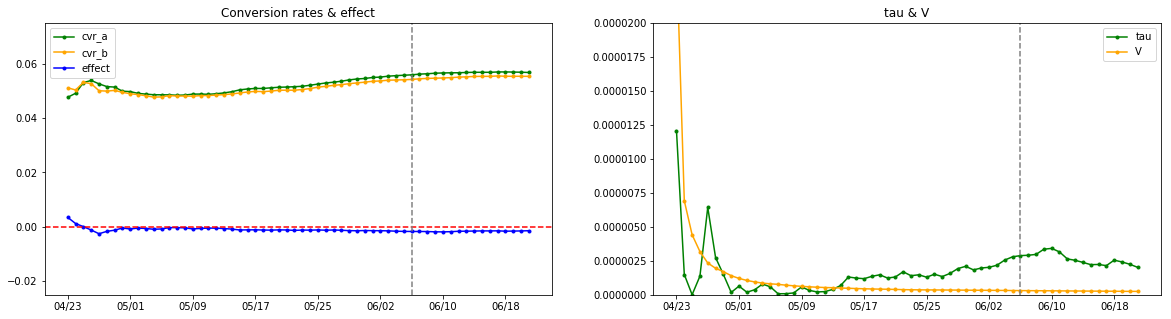

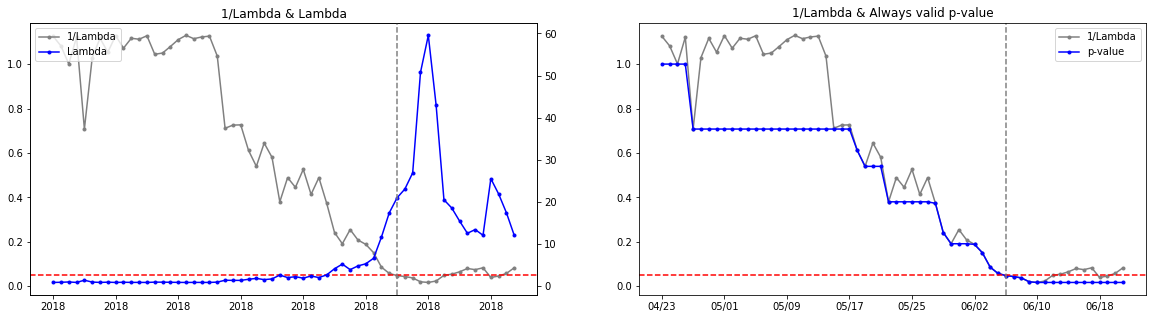

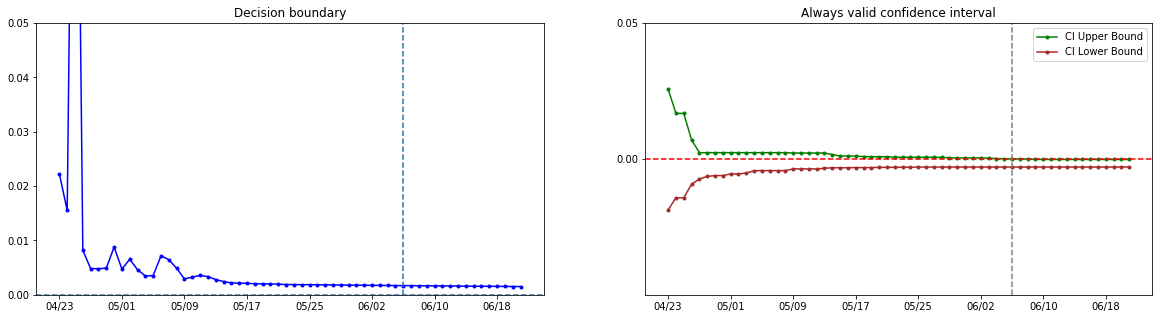

In [7]:
cvr_a, cvr_b, effect, tau, V, Lambda, decision_boundary, p_val, sig_val, ci_lb, ci_ub, res = ([] for i in range(12))
prev_p_val = 1
prev_effect_ci = [-1000,1000]

for i in range(len(df)):
    
    sa = df.cntr_act_cumu[i]
    na = df.cntr_gen_cumu[i]
    sb = df.test_act_cumu[i]
    nb = df.test_gen_cumu[i]
    
    # apply mSPRT
    ret = msprt_core.calc_stat(sa, na, sb, nb, alpha=0.05, 
                               prev_p_value=prev_p_val,
                               prev_effect_ci=prev_effect_ci)
    
    cvr_a.append(ret['cvr_a'])
    cvr_b.append(ret['cvr_b'])
    effect.append(ret['effect'])
    tau.append(ret['tau'])
    V.append(ret['V'])
    Lambda.append(ret['Lambda'])
    decision_boundary.append(ret['decision_boundary'])
    p_val.append(ret['p_value'])
    effect_ci = ret['effect_ci']
    res.append(ret['msprt_res'])
    
    sig_val.append(1-p_val[-1])
    ci_lb.append(effect_ci[0])
    ci_ub.append(effect_ci[1])
    
    prev_p_val = p_val[-1]
    prev_effect_ci = effect_ci
    
sig_loc = df.date2[np.where(np.array(sig_val)>0.95)[0][0]]
x_dates = [df.date2[i] for i in range(0, len(df.date2), 8)]

# Set 1: plot conversion rates, effect, tau, V
plt.figure(figsize=(20, 5))
ax1 = plt.subplot(121)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.plot(df.date2, cvr_a, 'o-', markersize=3, color='green', label='cvr_a')
plt.plot(df.date2, cvr_b, 'o-', markersize=3, color='orange', label='cvr_b')
plt.plot(df.date2, effect, 'o-', markersize=3, color='blue', label='effect')
plt.axhline(y=0.0, color='r', linestyle='--')
plt.axvline(sig_loc, color='grey', linestyle='--')
plt.xticks(x_dates)
plt.ylim([-0.025,0.075])
plt.title('Conversion rates & effect')
plt.legend()

ax2 = plt.subplot(122)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.plot(df.date2, tau, 'o-', markersize=3, color='green', label='tau')
plt.plot(df.date2, V, 'o-', markersize=3, color='orange', label='V')
plt.axvline(sig_loc, color='grey', linestyle='--')
plt.xticks(x_dates)
plt.ylim([0,0.00002])
plt.legend()
plt.title('tau & V')
plt.show()

# Set 2: plot Lambda, 1/Lambda, always valid p-value
plt.figure(figsize=(20, 5))
ax1 = plt.subplot(121)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax12 = ax1.twinx()
ax1.plot(df.date2, [1/x for x in Lambda], 'o-', markersize=3, color='grey', label='1/Lambda')
ax12.plot(df.date2, Lambda, 'o-', markersize=3, color='blue', label='Lambda')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax12.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)
ax1.axhline(y=0.05, color='r', linestyle='--')
plt.axvline(sig_loc, color='grey', linestyle='--')
plt.xticks(x_dates)
plt.title('1/Lambda & Lambda')

ax2 = plt.subplot(122)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.plot(df.date2, [1/x for x in Lambda], 'o-', markersize=3, color='grey', label='1/Lambda')
plt.plot(df.date2, p_val, 'o-', markersize=3, color='blue', label='p-value')
plt.axhline(y=0.05, color='red', linestyle='--')
plt.axvline(sig_loc, color='grey', linestyle='--')
plt.xticks(x_dates)
plt.title('1/Lambda & Always valid p-value')
plt.legend()
plt.show()

# Set 3: plot decision boundary, always valid confidence interval
plt.figure(figsize=(20, 5))
ax1 = plt.subplot(121)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.plot(df.date2, decision_boundary, 'o-', markersize=3, color='blue')
plt.axhline(y=0.0, linestyle='--')
plt.axvline(sig_loc, linestyle='--')
plt.xticks(x_dates)
plt.ylim([0,0.05])
plt.title('Decision boundary')

ax2 = plt.subplot(122)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.plot(df.date2, ci_ub, 'o-', markersize=3, color='green', label='CI Upper Bound')
plt.plot(df.date2, ci_lb, 'o-', markersize=3, color='brown', label='CI Lower Bound')
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(sig_loc, color='grey', linestyle='--')
plt.ylim([-0.05,0.05])
plt.yticks([0.0, 0.05])
plt.xticks(x_dates)
plt.title('Always valid confidence interval')
plt.legend()
plt.show()

In [8]:
df.tail()

,date,cntr_gen,test_gen,cntr_gen_cumu,test_gen_cumu,cntr_act,test_act,cntr_act_cumu,test_act_cumu,cntr_cvr_cumu,test_cvr_cumu,lift_cumu,date2
55,2018-06-17,4644,4720,398995,400445,313,322,22736,22232,0.056983,0.055518,-0.025708,2018-06-17
56,2018-06-18,6545,6620,405540,407065,381,322,23117,22554,0.057003,0.055406,-0.028009,2018-06-18
57,2018-06-19,7098,7042,412638,414107,382,385,23499,22939,0.056948,0.055394,-0.027294,2018-06-19
58,2018-06-20,6672,6872,419310,420979,358,382,23857,23321,0.056896,0.055397,-0.026343,2018-06-20
59,2018-06-21,2682,2637,421992,423616,108,134,23965,23455,0.056790,0.055369,-0.025033,2018-06-21


In [12]:
_ = helper.sample_size(mu=0.056, mde_value=0.025, relative_mde=True, pr=True)
_ = msprt_core.estimate_sample_size(mu=0.056, relative_mde_value=0.025, alpha=0.05)
424700/709201

Sample size for mu=0.0560, relative_mde_value=0.0250, absolute_mde_value=0.0014, alpha=0.0500, beta=0.0500:
variant_sample_size=709,201, total_sample_size=1,418,402
muA: 0.05600, muB: 0.05740, relative_mde_value: 0.02500, sample_size: 424,700


0.5988429232333288

## Highlights of Properties

1. Allow tradeoff between sample size and time  
2. daily check 

## References:
    
[1] R. Johari, P. Koomen, L. Pekelis, and D. Walsh, "Peeking at a/b tests: Why it matters, and what to do about it," in Proceedings of the 23rd ACM SIGKDD International Conference
on Knowledge Discovery and Data Mining. ACM, 2017, pp. 1517–1525.

[2] Z. Zhao, M. Liu, and A. Deb, "Safely and Quickly Deploying New Features with a Staged Rollout Framework Using Sequential Test and Adaptive Experimental Design," in 3rd International Conference on Computational Intelligence and Applications (ICCIA). IEEE, 2018, pp. 59–70.